In [24]:
#from _future_ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [30]:
minst=tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test)=minst.load_data()
x_train, x_test=x_train/255.0, x_test/255.0

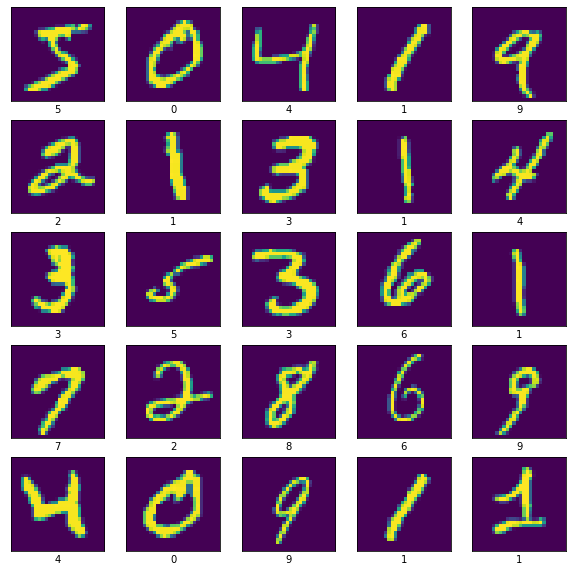

In [31]:
class_names=['0','1','2','3','4',
             '5','6','7','8','9']
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i]])
plt.show()

In [32]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_train.shape
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [33]:
x_train.shape

(60000, 28, 28, 1)

In [34]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10, validation_data=(x_test,y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 63s 33ms/step - loss: 0.1424 - accuracy: 0.9560 - val_loss: 0.0466 - val_accuracy: 0.9846
Epoch 2/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0442 - accuracy: 0.9863 - val_loss: 0.0321 - val_accuracy: 0.9888
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0322 - accuracy: 0.9897 - val_loss: 0.0358 - val_accuracy: 0.9880
Epoch 4/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.0324 - val_accuracy: 0.9898
Epoch 5/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0264 - val_accuracy: 0.9930
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.0275 - val_accuracy: 0.9914
Epoch 7/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0124 - accuracy: 0.9959 - val_loss: 0.0338 - val_accura

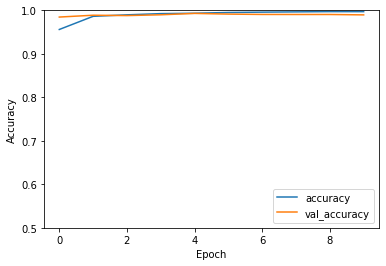

313/313 - 3s - loss: 0.0472 - accuracy: 0.9896 - 3s/epoch - 9ms/step


In [59]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
plt.show()


test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)


In [42]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0472 - accuracy: 0.9896


[0.04715508595108986, 0.9896000027656555]

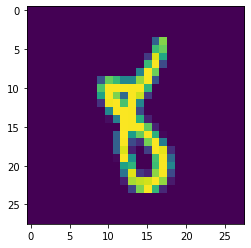

(28, 28)

In [44]:
import matplotlib.pyplot as plt
x_test=x_test.reshape(x_test.shape[0],28,28)
plt.imshow(x_test[5678])
plt.show()
x_test[5678].shape

In [53]:
x_test =x_test.reshape(x_test.shape[0],28,28,1)
predictions=model.predict(x_test)
np.argmax(predictions[5678])

8

In [48]:
pred=[]
for j in range (len(predictions)):
  pred.append(np.argmax(predictions[j]))
import sklearn
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[ 974,    1,    1,    0,    0,    0,    0,    1,    2,    1],
       [   0, 1134,    0,    1,    0,    0,    0,    0,    0,    0],
       [   1,    1, 1022,    0,    0,    0,    0,    7,    1,    0],
       [   0,    1,    1,  998,    0,    4,    0,    5,    1,    0],
       [   0,    0,    0,    0,  972,    0,    1,    1,    1,    7],
       [   0,    0,    0,    4,    0,  874,    1,    2,    6,    5],
       [   2,    3,    0,    0,    5,    0,  936,    0,   12,    0],
       [   0,    2,    3,    0,    0,    0,    0, 1023,    0,    0],
       [   1,    0,    3,    0,    0,    0,    0,    2,  967,    1],
       [   0,    0,    0,    0,    3,    4,    0,    4,    2,  996]])

In [50]:
print('Accuracy:', sklearn.metrics.accuracy_score(y_test,pred))
print('F1 score:', sklearn.metrics.f1_score(y_test,pred,average='weighted'))
print('Recall', sklearn.metrics.recall_score(y_test,pred,average='weighted'))
print('Precision', sklearn.metrics.precision_score(y_test,pred,average='weighted'))

Accuracy: 0.9896
F1 score: 0.9896025288096476
Recall 0.9896
Precision 0.9896666139277382
